# <center><img src="https://raw.githubusercontent.com/facebookresearch/detectron2/master/.github/Detectron2-Logo-Horz.svg"><center/>

<h2><center> <a href="https://github.com/facebookresearch/detectron2">Detectron2</a> is a PyTorch based modular object detection library</center></h2>

<h4 style="text-align: right, line-height: 3.5em;"> Detectron 2 is a next-generation open-source object detection system from Facebook AI Research. It can be used to train various state-of-the-art models like <a href="http://densepose.org/">Densepose </a> and <a href="https://ai.facebook.com/blog/improving-scene-understanding-through-panoptic-segmentation/">panoptic feature pyramid networks</a> for detection tasks such as bounding-box detection, instance and semantic segmentation, and person keypoint detection. With a modular design, Detectron2 is flexible and extensible, and able to provide fast training on single or multiple GPU servers. </h4>
    
    
<h4> I hope that releasing Detectron2 will continue to accelerate progress in the area of object detection and segmentation. This Kernel is my attempt of contributing to the progress. </h4>

### Installation
* Most of the libraries required for visualization like [skimage](https://scikit-image.org/docs/dev/api/skimage.html) and [matplotlib](https://matplotlib.org/) come preinstalled in kaggle environment.
* One library required to visualize COCO dataset is [Pycocotools]() which can be installed using the following command.
`pip install 'git+https://github.com/cocodataset/cocoapi.git#subdirectory=PythonAPI`

In [1]:
!pip install 'git+https://github.com/cocodataset/cocoapi.git#subdirectory=PythonAPI'

  Cloning https://github.com/cocodataset/cocoapi.git to /tmp/pip-req-build-cq2iljpi
  Created wheel for pycocotools: filename=pycocotools-2.0-cp37-cp37m-linux_x86_64.whl size=273703 sha256=c52ae13070d8bb03363258b167b1ca40bf0e9ad8bda8cd54d4634972936e4169
  Stored in directory: /tmp/pip-ephem-wheel-cache-wnl24aiv/wheels/e2/6b/1d/344ac773c7495ea0b85eb228bc66daec7400a143a92d36b7b1
Successfully built pycocotools
You should consider upgrading via the '/opt/conda/bin/python3.7 -m pip install --upgrade pip' command.


### <h3 class="list-group-item list-group-item-action active" data-toggle="list" style='background:black; border:0' role="tab" aria-controls="home"><center>Import Libraries</center></h3>

In [2]:
%matplotlib inline
from pycocotools.coco import COCO
import numpy as np
import skimage.io as io
import matplotlib.pyplot as plt
import pylab
import random
pylab.rcParams['figure.figsize'] = (8.0, 10.0)# Import Libraries

# For visualization
import os
import seaborn as sns
from matplotlib import colors
from tensorboard.backend.event_processing import event_accumulator as ea
from PIL import Image

<h3 class="list-group-item list-group-item-action active" data-toggle="list" style='background:black; border:0' role="tab" aria-controls="home"><center>Set constant variables</center></h3>

In [3]:
# I am visualizing some images in the 'val/' directory

dataDir='../input/coco-car-damage-detection-dataset/val'
dataType='COCO_val_annos'
mul_dataType='COCO_mul_val_annos'
annFile='{}/{}.json'.format(dataDir,dataType)
mul_annFile='{}/{}.json'.format(dataDir,mul_dataType)
img_dir = "../input/coco-car-damage-detection-dataset/img"

<h3 class="list-group-item list-group-item-action active" data-toggle="list" style='background:black; border:0' role="tab" aria-controls="home"><center> Initialize the COCO API</center></h3>

In [4]:
# initialize coco api for instance annotations
coco=COCO(annFile)
mul_coco=COCO(mul_annFile)

loading annotations into memory...
Done (t=0.04s)
creating index...
index created!
loading annotations into memory...
Done (t=0.02s)
creating index...
index created!


<h3 class="list-group-item list-group-item-action active" data-toggle="list" style='background:black; border:0' role="tab" aria-controls="home"><center> Display damage categories and supercategories</center></h3>

In [5]:
# display categories and supercategories

#Single Class #Damage dataset
cats = coco.loadCats(coco.getCatIds())
nms=[cat['name'] for cat in cats]
print('COCO categories for damages: \n{}\n'.format(', '.join(nms)))

nms = set([cat['supercategory'] for cat in cats])
print('COCO supercategories for damages: \n{}\n'.format(', '.join(nms)))

#Multi Class #Parts dataset

mul_cats = mul_coco.loadCats(mul_coco.getCatIds())
mul_nms=[cat['name'] for cat in mul_cats]
print('COCO categories for parts: \n{}\n'.format(', '.join(mul_nms)))

mul_nms = set([mul_cat['supercategory'] for mul_cat in mul_cats])
print('COCO supercategories for parts: \n{}\n'.format(', '.join(mul_nms)))

COCO categories for damages: 
damage

COCO supercategories for damages: 
part

COCO categories for parts: 
headlamp, rear_bumper, door, hood, front_bumper

COCO supercategories for parts: 
part



In [6]:
# get all images containing 'damage' category, select one at random
catIds = coco.getCatIds(catNms=['damage']);
imgIds = coco.getImgIds(catIds=catIds );

In [7]:
random_img_id = random.choice(imgIds)
print("{} image id was selected at random from the {} list".format(random_img_id, imgIds))

6 image id was selected at random from the [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10] list


In [8]:
# Load the image
imgId = coco.getImgIds(imgIds = [random_img_id])
img = coco.loadImgs(imgId)[0]
print("Image details \n",img)

Image details 
 {'coco_url': '', 'date_captured': '2020-07-14 09:59:34.190485', 'file_name': '62.jpg', 'flickr_url': '', 'height': 1024, 'id': 6, 'license': 1, 'width': 1024}


<h3 class="list-group-item list-group-item-action active" data-toggle="list" style='background:black; border:0' role="tab" aria-controls="home"><center> Raw Image</center></h3>

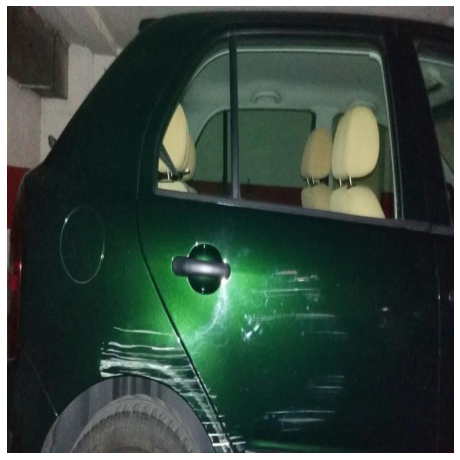

In [9]:
I = io.imread(img_dir + '/' + img['file_name'])
plt.axis('off')
plt.imshow(I)
plt.show()

<h3 class="list-group-item list-group-item-action active" data-toggle="list" style='background:black; border:0' role="tab" aria-controls="home"><center> Image with damage annotation</center></h3>

In [10]:
#get damage annotations
annIds = coco.getAnnIds(imgIds=imgId,iscrowd=None)
anns = coco.loadAnns(annIds)

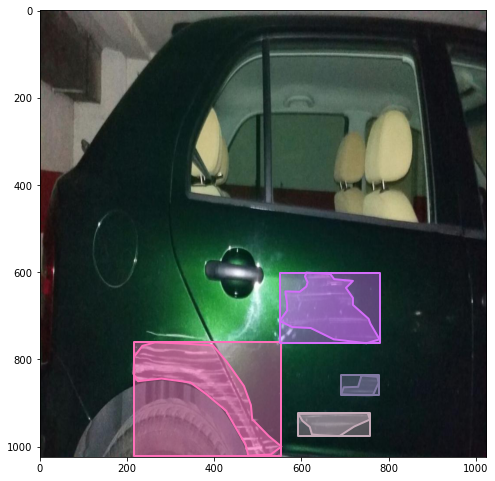

In [11]:
#Plot damages
plt.imshow(I)
plt.axis('on')
coco.showAnns(anns, draw_bbox=True )

<h3 class="list-group-item list-group-item-action active" data-toggle="list" style='background:black; border:0' role="tab" aria-controls="home"><center> Image with parts annotation</center></h3>

In [12]:
#get parts annotations
mul_annIds = mul_coco.getAnnIds(imgIds=imgId,iscrowd=None)
mul_anns = mul_coco.loadAnns(mul_annIds)

In [13]:
# Create a dictionary between category_id and category name
category_map = dict()

for ele in list(mul_coco.cats.values()):
    category_map.update({ele['id']:ele['name']})

In [14]:
category_map

{1: 'headlamp', 2: 'rear_bumper', 3: 'door', 4: 'hood', 5: 'front_bumper'}

Parts are: ['headlamp', 'door']


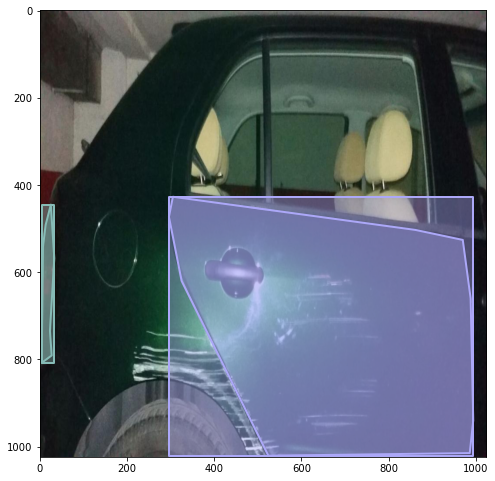

In [15]:
#Create a list of parts in the image
parts = []
for region in mul_anns:
    parts.append(category_map[region['category_id']])

print("Parts are:", parts) 

#Plot Parts
I = io.imread(img_dir + '/' + img['file_name'])
plt.imshow(I)
plt.axis('on')
mul_coco.showAnns(mul_anns, draw_bbox=True )

<h2 class="list-group-item list-group-item-action active" data-toggle="list" style='background:black;' role="tab" aria-controls="home"><center> Training Object detection model using Detectron 2</center></h2>

<h3 class="list-group-item list-group-item-action active" data-toggle="list" style='background:black;' role="tab" aria-controls="home"><center> Installation </center></h3>

In [16]:
# Install detectron 2
!python -m pip install detectron2 -f https://dl.fbaipublicfiles.com/detectron2/wheels/cu102/torch1.7/index.html

Looking in links: https://dl.fbaipublicfiles.com/detectron2/wheels/cu102/torch1.7/index.html
     |████████████████████████████████| 6.1 MB 368 kB/s eta 0:00:01
     |████████████████████████████████| 130 kB 12.3 MB/s eta 0:00:01
     |████████████████████████████████| 98 kB 6.0 MB/s  eta 0:00:01
     |████████████████████████████████| 50 kB 5.4 MB/s  eta 0:00:01
     |████████████████████████████████| 154 kB 78.6 MB/s eta 0:00:01
     |████████████████████████████████| 117 kB 54.1 MB/s eta 0:00:01
     |████████████████████████████████| 79 kB 7.4 MB/s  eta 0:00:01
     |████████████████████████████████| 403 kB 60.7 MB/s eta 0:00:01
     |████████████████████████████████| 778 kB 59.5 MB/s eta 0:00:01
  Created wheel for fvcore: filename=fvcore-0.1.5.post20221221-py3-none-any.whl size=61432 sha256=15d94c9c867d261d6fc74ba8b212c61253662bba1ebaa28fe33c2357b58f7a31
  Stored in directory: /root/.cache/pip/wheels/af/cd/23/3fb62ec8606cb08cc18abb8d67bec255baf353623be889da1e
  Created wheel for 

<h3 class="list-group-item list-group-item-action active" data-toggle="list" style='background:black;' role="tab" aria-controls="home"><center> Import Libraries required for training</center></h3>

In [17]:
import torch, torchvision
print(torch.__version__, torch.cuda.is_available())

1.7.0 True


In [18]:
assert torch.__version__.startswith("1.7")

In [19]:
import detectron2
from detectron2.utils.logger import setup_logger
setup_logger()

# import some common libraries
import numpy as np
import os, json, cv2, random
import matplotlib.pyplot as plt
import skimage.io as io

# import some common detectron2 utilities
from detectron2 import model_zoo
from detectron2.engine import DefaultPredictor
from detectron2.config import get_cfg
from detectron2.utils.visualizer import Visualizer
from detectron2.data import MetadataCatalog, DatasetCatalog
from detectron2.engine import DefaultTrainer
from detectron2.utils.visualizer import ColorMode
from detectron2.evaluation import COCOEvaluator, inference_on_dataset
from detectron2.data import build_detection_test_loader

# Set base params
plt.rcParams["figure.figsize"] = [16,9]

In [20]:
# To find out inconsistent CUDA versions, if there is not "failed" word in this output then things are fine.
!python -m detectron2.utils.collect_env

----------------------  ------------------------------------------------------------------------------
sys.platform            linux
Python                  3.7.6 | packaged by conda-forge | (default, Mar 23 2020, 23:03:20) [GCC 7.3.0]
numpy                   1.17.5
detectron2              0.5 @/opt/conda/lib/python3.7/site-packages/detectron2
Compiler                GCC 7.3
CUDA compiler           CUDA 10.2
detectron2 arch flags   3.7, 5.0, 5.2, 6.0, 6.1, 7.0, 7.5
DETECTRON2_ENV_MODULE   <not set>
PyTorch                 1.7.0 @/opt/conda/lib/python3.7/site-packages/torch
PyTorch debug build     True
GPU available           Yes
GPU 0                   Tesla P100-PCIE-16GB (arch=6.0)
CUDA_HOME               /usr/local/cuda
Pillow                  8.0.1
torchvision             0.8.1 @/opt/conda/lib/python3.7/site-packages/torchvision
torchvision arch flags  3.5, 5.0, 6.0, 7.0, 7.5
fvcore                  0.1.5.post20221221
iopath                  0.1.8
cv2                     4.4.0
----

<h3 class="list-group-item list-group-item-action active" data-toggle="list" style='background:black;' role="tab" aria-controls="home"><center>  Register Car Damage Dataset </center></h3>

In [21]:

dataset_dir = "../input/coco-car-damage-detection-dataset"
img_dir = "img/"
train_dir = "train/"
val_dir = "val/"

If you want to use a custom dataset while also reusing detectron2’s data loaders, you will need to

*  Register your dataset (i.e., tell detectron2 how to obtain your dataset).

* Optionally, register metadata for your dataset.

In [22]:
from detectron2.data.datasets import register_coco_instances
register_coco_instances("car_dataset_train", {}, os.path.join(dataset_dir,train_dir,"COCO_train_annos.json"), os.path.join(dataset_dir,img_dir))
register_coco_instances("car_dataset_val", {}, os.path.join(dataset_dir,val_dir,"COCO_val_annos.json"), os.path.join(dataset_dir,img_dir))

In [23]:
dataset_dicts = DatasetCatalog.get("car_dataset_train")
metadata_dicts = MetadataCatalog.get("car_dataset_train")

[07/31 08:36:52 d2.data.datasets.coco]: Loaded 59 images in COCO format from ../input/coco-car-damage-detection-dataset/train/COCO_train_annos.json


<h2 class="list-group-item list-group-item-action active" data-toggle="list" style='background:black;' role="tab" aria-controls="home"><center> Model Train </center></h2>

In [24]:
#Implementing my own Trainer Module here to use the COCO validation evaluation during training
# TODO: add data custom augmentation 
class CocoTrainer(DefaultTrainer):

  @classmethod
  def build_evaluator(cls, cfg, dataset_name, output_folder=None):

    if output_folder is None:
        os.makedirs("coco_eval", exist_ok=True)
        output_folder = "coco_eval"

    return COCOEvaluator(dataset_name, cfg, False, output_folder)

In [ ]:
cfg = get_cfg()
cfg.merge_from_file(model_zoo.get_config_file("COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x.yaml"))
cfg.DATASETS.TRAIN = ("car_dataset_train",)
cfg.DATASETS.TEST = ("car_dataset_val",)
cfg.DATALOADER.NUM_WORKERS = 4
cfg.MODEL.WEIGHTS = model_zoo.get_checkpoint_url("COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x.yaml")  # Let training initialize from model zoo
cfg.SOLVER.IMS_PER_BATCH = 4
cfg.SOLVER.BASE_LR = 0.001  # pick a good LR
cfg.SOLVER.WARMUP_ITERS = 800
cfg.SOLVER.MAX_ITER = 1600 #adjust up if val mAP is still rising, adjust down if overfit
cfg.SOLVER.STEPS = (600,1550)
cfg.SOLVER.GAMMA = 0.05
cfg.MODEL.ROI_HEADS.BATCH_SIZE_PER_IMAGE = 128   # faster, and good enough for this  dataset (default: 512)
cfg.MODEL.ROI_HEADS.NUM_CLASSES = 1  # only has one class (damage) + 1
cfg.MODEL.RETINANET.NUM_CLASSES = 1 # only has one class (damage) + 1
cfg.TEST.EVAL_PERIOD = 600



# Clear any logs from previous runs
#TODO add timestamp to logs
!rm -rf cfg.OUTPUT_DIR


os.makedirs(cfg.OUTPUT_DIR, exist_ok=True)
trainer = CocoTrainer(cfg) 
trainer.resume_or_load(resume=False)
trainer.train()

[07/31 08:36:56 d2.engine.defaults]: Model:
GeneralizedRCNN(
  (backbone): FPN(
    (fpn_lateral2): Conv2d(256, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output2): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral3): Conv2d(512, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output3): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral4): Conv2d(1024, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output4): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral5): Conv2d(2048, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output5): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (top_block): LastLevelMaxPool()
    (bottom_up): ResNet(
      (stem): BasicStem(
        (conv1): Conv2d(
          3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False
          (norm): FrozenBatchNorm2d(num_features=64, eps=1e-05)
        )
      )
      (res

model_final_f10217.pkl: 178MB [00:00, 255MB/s]                             


[07/31 08:37:03 d2.engine.train_loop]: Starting training from iteration 0


/opt/conda/lib/python3.7/site-packages/detectron2/structures/masks.py:363: UserWarning: This overload of nonzero is deprecated:
	nonzero()
Consider using one of the following signatures instead:
	nonzero(*, bool as_tuple) (Triggered internally at  /opt/conda/conda-bld/pytorch_1603729138878/work/torch/csrc/utils/python_arg_parser.cpp:882.)
  item = item.nonzero().squeeze(1).cpu().numpy().tolist()
/opt/conda/lib/python3.7/site-packages/detectron2/structures/masks.py:363: UserWarning: This overload of nonzero is deprecated:
	nonzero()
Consider using one of the following signatures instead:
	nonzero(*, bool as_tuple) (Triggered internally at  /opt/conda/conda-bld/pytorch_1603729138878/work/torch/csrc/utils/python_arg_parser.cpp:882.)
  item = item.nonzero().squeeze(1).cpu().numpy().tolist()
/opt/conda/lib/python3.7/site-packages/detectron2/structures/masks.py:363: UserWarning: This overload of nonzero is deprecated:
	nonzero()
Consider using one of the following signatures instead:
	nonzer

[07/31 08:37:12 d2.utils.events]:  eta: 0:10:46  iter: 19  total_loss: 1.988  loss_cls: 0.7152  loss_box_reg: 0.3636  loss_mask: 0.6941  loss_rpn_cls: 0.157  loss_rpn_loc: 0.02117  time: 0.4068  data_time: 0.0228  lr: 2.1638e-06  max_mem: 3183M
[07/31 08:37:21 d2.utils.events]:  eta: 0:10:53  iter: 39  total_loss: 1.99  loss_cls: 0.6785  loss_box_reg: 0.3943  loss_mask: 0.6933  loss_rpn_cls: 0.1756  loss_rpn_loc: 0.02258  time: 0.4139  data_time: 0.0101  lr: 3.3888e-06  max_mem: 3183M
[07/31 08:37:29 d2.utils.events]:  eta: 0:10:43  iter: 59  total_loss: 1.873  loss_cls: 0.6476  loss_box_reg: 0.347  loss_mask: 0.6921  loss_rpn_cls: 0.1438  loss_rpn_loc: 0.0214  time: 0.4116  data_time: 0.0099  lr: 4.6137e-06  max_mem: 3183M
[07/31 08:37:37 d2.utils.events]:  eta: 0:10:44  iter: 79  total_loss: 1.946  loss_cls: 0.5875  loss_box_reg: 0.3652  loss_mask: 0.6896  loss_rpn_cls: 0.1903  loss_rpn_loc: 0.02289  time: 0.4140  data_time: 0.0097  lr: 5.8388e-06  max_mem: 3183M
[07/31 08:37:46 d2.u

<h3 class="list-group-item list-group-item-action active" data-toggle="list" style='background:black;' role="tab" aria-controls="home"><center>  Model Metrics and Hyper Parameters Visualization </center></h3>

In [ ]:
# Look at training curves in tensorboard:
# %reload_ext tensorboard
# %tensorboard --logdir ./output

### Note: Unfortunately, there is some issue with tensorboard in Kaggle so I thought of using seaborn to visualize the plots.

Source: https://www.kaggle.com/product-feedback/89671#764494

In [ ]:
def smooth(scalars, weight=0.6):
    """
    Reference: https://github.com/plotly/dash-live-model-training/blob/master/app.py#L163
    """
    last = scalars[0]
    smoothed = list()
    for point in scalars:
        smoothed_val = last * weight + (1 - weight) * point
        smoothed.append(smoothed_val)
        last = smoothed_val
    return smoothed


def plot(logdir: str, savedir: str, smoothing: float = 0.6, no_title=False, no_legend=False, no_axis_labels=False):
    """ re-draw the tf summary events plots  using seaborn
    :param logdir: Path to the directory having event logs
    :param savedir: Path to save the seaborn graphs
    :param smoothing: smoothing window space for the plots
    """
    assert 0 <= smoothing <= 1, 'Smoothing value should be in [0,1]'
    
    plots = []
    
    sns.set(style="darkgrid")
    sns.set_context("paper")

    # Collect data
    # we recognize all files which have tfevents
    scalars_info = {}
    for root, dirs, files in os.walk(logdir):
        for event_file in [x for x in files if 'tfevents' in x]:
            event_path = os.path.join(root, event_file)

            acc = ea.EventAccumulator(event_path)
            acc.Reload()

            # only support scalar now
            scalar_list = acc.Tags()['scalars']
            for tag in scalar_list:
                x = [s.step for s in acc.Scalars(tag)]
                y = [s.value for s in acc.Scalars(tag)]
                data = {'x': x, 'y': y, 'legend': root.split(logdir)[1][1:] if root != logdir else None}
                if tag not in scalars_info:
                    scalars_info[tag] = [data]
                else:
                    scalars_info[tag].append(data)

    # We recognize groups assuming each group name has /
    # And, each group is saved in a separate directory
    for tag, tag_data in scalars_info.items():
        _split = tag.split('/')
        if len(_split) <= 1:
            _path = os.path.join(savedir, 'seaborn')
            _name = _split[0]
        else:
            _path = os.path.join(savedir, 'seaborn', _split[0])
            _name = ''.join(_split[1:])

        os.makedirs(_path, exist_ok=True)

        color_list = list(sns.color_palette(palette='dark', n_colors=len(tag_data)))[::-1]
        for data in tag_data:
            x, y = data['x'], data['y']
            y_smooth = smooth(y, weight=smoothing)
            current_color = color_list.pop()
            _plt = sns.lineplot(x, y, color=colors.to_rgba(current_color, alpha=0.4))
            _legend = data['legend'] if not no_legend else None
            _plt = sns.lineplot(x, y_smooth, label=data['legend'], color=current_color)

        if not no_axis_labels:
            _plt.set(xlabel='x', ylabel='y')
        if not no_title:
            _plt.set_title(_name.capitalize())
        
        plots.append(os.path.join(_path, _name + '.png'))
        plt.savefig(os.path.join(_path, _name + '.png'))
        plt.clf()
    return plots

In [ ]:
plots = plot(logdir= './output', savedir= './')

In [ ]:
plots

In [ ]:
my_dpi = 1000
fig, ax = plt.subplots(4,1, figsize = (12,10), dpi=my_dpi)


ax[0].set_title('Total Loss', fontsize=12)
ax[0].set_xticks([])
ax[0].set_yticks([])
ax[0].imshow(Image.open('./seaborn/total_loss.png'))

ax[1].set_title('Bounding Box Average Precision', fontsize=12)
ax[1].set_xticks([])
ax[1].set_yticks([])
ax[1].imshow(Image.open('./seaborn/bbox/AP.png'))

ax[2].set_title('Segmentation Average Precision', fontsize=12)
ax[2].set_xticks([])
ax[2].set_yticks([])
ax[2].imshow(Image.open('./seaborn/segm/AP.png'))

ax[3].set_title('Class accuracy', fontsize=12)
ax[3].set_xticks([])
ax[3].set_yticks([])
ax[3].imshow(Image.open('./seaborn/fast_rcnn/cls_accuracy.png'))

* I think the training worked well as the loss has decreased over the runs.
* The class accuracy and average precision has improved over the runs.

<h2 class="list-group-item list-group-item-action active" data-toggle="list" style='background:black;' role="tab" aria-controls="home"><center> Model Evaluation </center></h2>

In [ ]:
evaluator = COCOEvaluator("car_dataset_val", cfg, False, output_dir="./output/")
val_loader = build_detection_test_loader(cfg, "car_dataset_val")
print(inference_on_dataset(trainer.model, val_loader, evaluator))

<h2 class="list-group-item list-group-item-action active" data-toggle="list" style='background:black;' role="tab" aria-controls="home"><center> Model Inference </center></h2>

In [ ]:
cfg.MODEL.WEIGHTS = os.path.join(cfg.OUTPUT_DIR, "model_final.pth")
cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.7   # set a custom testing threshold for this model
cfg.DATASETS.TEST = ("car_dataset_val", )
predictor = DefaultPredictor(cfg)

In [ ]:
val_dataset_dicts = DatasetCatalog.get("car_dataset_val")
val_metadata_dicts = MetadataCatalog.get("car_dataset_val")

In [ ]:
fig, ax = plt.subplots(2, 2, figsize =(16,12))
indices=[ax[0][0],ax[1][0],ax[0][1],ax[1][1] ]
i=-1
for d in random.sample(val_dataset_dicts, 4):
    i=i+1    
    im = io.imread(d["file_name"])
    outputs = predictor(im)
    v = Visualizer(im[:, :, ::-1],
                   metadata=val_metadata_dicts, 
                   scale=0.5, 
                   instance_mode=ColorMode.IMAGE_BW   # remove the colors of unsegmented pixels. This option is only available for segmentation models
    )
    out = v.draw_instance_predictions(outputs["instances"].to("cpu"))
    indices[i].grid(False)
    indices[i].imshow(out.get_image()[:, :, ::-1])

### Conclusion
* I think the results are quite fine even when the training data was around 60 images.
* Data augmentation can significantly improve the results.
* I will try doing multiclass object detection next.

In [ ]:
!zip -r  cdds.zip /kaggle/working/

In [ ]:
from IPython.display import FileLink
FileLink(r'cdds.zip')